# Machine Learning Engineering - Assignment 3 
## Part 4. Classroom challenge (5 + 5 points)
The final part of this assignment is a small classroom challenge. The code below will allow you to submit your best models to OpenML, where you will be able to see how it compares to the models of other students in the course. As such, if you have already identified good models in part 2, it may only take a few minutes of coding and then running your model. The main goal is to allow you to explore the results of others afterward. This 'challenge' will happen in two phases:

**The closed phase:** this phase runs up to the end of Assignment 3 (April 5th). The only thing you need to do is submit your best models using the code below (i.e. copy it over into this notebook). This will evaluate your model via a 3-fold cross-validation procedure and submit the results. The model will be trained by you, but evaluated on the OpenML platform. On the [Leaderboard](https://www.openml.org/t/362070) (open the Analysis tab) you'll be able to see how well your model performs compared to others, evaluated using Area under the ROC curve (AUC). In this phase you won't be able to see which models they built (only their scores). You can do multiple submissions if you think you can further improve your model, but don't spend too much time (and GPU resources) on small improvements.

**The open phase:** a few days after the assignment deadline, all the models of the other students will become visible. You can then explore them on the OpenML website, but you'll also be able to download and visualize them locally (code below). This is mainly meant for you to learn from what others have done, and what works and what doesn't. Feel free to discuss ideas and experiences afterwards on Canvas. This part is not graded, only for you to learn.

Notes:
* You also need to upload this notebook (with your implemented model) to GitHub in your assignment repository. 
* There is no 100MB limit on your model size.
* You can choose between using TensorFlow or Torch. You do NOT need to do both.
* For TensorFlow, you'll need to use the (more flexible) functional API instead of `model.Sequential`. It is very easy to adapt, though.
* You can run this notebook locally, on Colab, or anywhere you like. You can also copy the code into a script and run it that way. Up to you.
* The scores you get here are computed with AUC (not accuracy), and using different splits, so obviously the actual scores will be somewhat different from your score in part 2. Still, a good model should also perform well here.

As explained earlier, the grading for this part is as follows:
* 5 points: Based on your AUC score, graded on a curve, with the same expected performance as in Part 2, and the highest grade being given to the best submitted model.
* 5 points: Calculated based on how well your model from Part 2 (uploaded to GitHub) works on the unique new test set consisting of the images collected by all your classmates. You don't need to do anything for this except finishing Parts 2 and 3 of this assignment.

_Sidenote: this approach is still experimental. If anything goes wrong, don't panic, we will adapt appropriately._

## Prerequisites
Install the TensorFlow (or Torch) bindings.

In [7]:
#!pip install wurlitzer
!pip install git+https://github.com/openml/openml-python.git@feat/progress

  Cloning https://github.com/openml/openml-python.git (to revision feat/progress) to /tmp/pip-req-build-vifid4ez
  Running command git clone --filter=blob:none --quiet https://github.com/openml/openml-python.git /tmp/pip-req-build-vifid4ez
  Running command git checkout -b feat/progress --track origin/feat/progress
  Switched to a new branch 'feat/progress'
  Branch 'feat/progress' set up to track remote branch 'feat/progress' from 'origin'.
  Resolved https://github.com/openml/openml-python.git to commit ce512e8b71181e407ca6ec2a923d937f56f86c1c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [8]:
import openml

In [4]:
# Uncomment if OpenML isn't installed (e.g. on Google Colab)
#!pip install openml --quiet
!pip install wurlitzer
!pip install git+https://github.com/openml/openml-python.git@feat/progress

# People using TensorFlow please install:
!pip install git+https://github.com/openml/openml-tensorflow@assignment3 --quiet

# People using Torch please install:
#!pip install torchvision --quiet
#!pip install git+https://github.com/openml/openml-pytorch.git@feature/dataloader_imagedataset --quiet

import openml
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

# Uncomment if you want to set the cache directory in Colab
#openml.config.set_root_cache_directory(os.path.expanduser('/content/cache'))

#### OpenML API key
Although OpenML doesn't require an account to download things, you do need an account to upload things. If you don't have an account yet, go to [openml.org](openml.org) to create one. If you are logged in, you can go to your [profile page](https://www.openml.org/auth/profile-page) to find the API key (a string of 32 characters).

In [5]:
# Add your API key here. You can remove it afterward.  
openml.config.apikey = '0a931e263435d3b47e0a8319a88afd65'

### Data fetching

In [10]:
from pathlib import Path
d = openml.datasets.get_dataset(45936)
if not (Path(d.data_file).parent / "Images").exists():
    d = openml.datasets.get_dataset(45936, download_all_files=True)  

data_dir = os.path.join(os.path.dirname(d.data_file), "Images")
df, *_ = d.get_data()

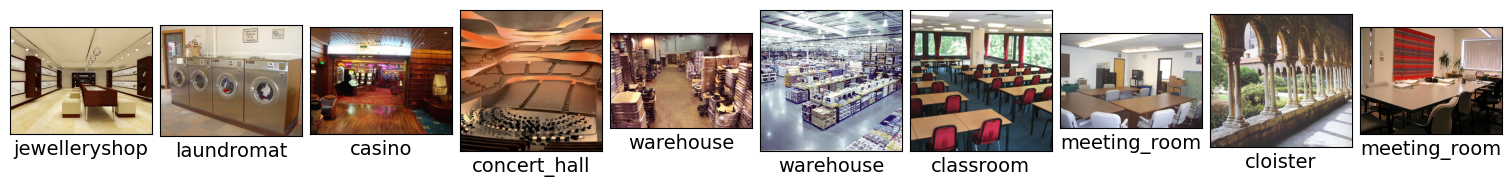

In [11]:
# Visualize 10 random images 
df_sub = df.sample(n=10)
X = [cv2.imread(os.path.join(data_dir, filename)) for filename in df_sub['Filename'].to_numpy()]
y = df_sub['Class_name'].to_numpy()
fig, axes = plt.subplots(1, 10,  figsize=(15,45), layout='constrained')
for n in range(10):
    img_rgb = cv2.cvtColor(X[n], cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    axes[n].imshow(img_rgb)
    axes[n].set_xlabel(y[n], fontsize=14)
    axes[n].set_xticks(()), axes[n].set_yticks(())

## Using TensorFlow
Configuration

In [12]:
import openml_tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset bindings
openml_tensorflow.config.dir = data_dir
openml_tensorflow.config.x_col = "Filename"
openml_tensorflow.config.y_col = 'Class_encoded'
openml_tensorflow.config.class_mode = "categorical"

2024-04-14 19:41:10.035486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 19:41:10.035639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 19:41:10.195870: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Submission code

In [13]:
def evaluate_model(model):
    # Download CV splits
    task = openml.tasks.get_task(362070)
    # Evaluate model
    run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)
    # Publish
    run = openml_tensorflow.add_onnx_to_run(run) # Optional, to inspect afterward
    run.publish()
    return run

#### Build your own model
To help you, here's a toy model - check how TensorFlow's [functional API](https://www.tensorflow.org/guide/keras/functional_api) works

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Input, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

def build_toy_model():
    # Define the input
    inputs = Input(shape=(128, 128, 3))

    # A simple convolutional layer, GAP, and output layer
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = GlobalAveragePooling2D()(x)
    output = Dense(67, activation='softmax')(x)

    # Create and compile model
    model = Model(inputs=inputs, outputs=output)
    model.compile(Adam(learning_rate=4e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def build_toy_pretrained_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    output = Dense(67, activation='softmax')(x)

    # Create and compile model
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(Adam(learning_rate=4e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

#### Run
_You'll get a link to your experiment on OpenML (you will need to be logged in during the closed phase)._

In [22]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
learning_rate=0.0001
trainable_layers=0
IMG_SIZE=128
def build_model_2():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)) 

    for layer in base_model.layers[:-trainable_layers]:
        layer.trainable = False

    x = base_model.output 
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x) 
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(67, activation='softmax')(x)  

    model = Model(inputs=base_model.input, outputs=predictions)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model





In [23]:
# Training parameters
datagen = ImageDataGenerator(horizontal_flip=True) # You can add more data augmentations
openml_tensorflow.config.datagen = datagen
openml_tensorflow.config.batch_size = 32
openml_tensorflow.config.epoch = 1

# Run
run = evaluate_model(build_model_2()) # Replace with your model
print("Run is uploaded at https://www.openml.org/r/{}".format(run.run_id))

Found 10413 validated image filenames belonging to 67 classes.
Training (10413 samples)
100/100 [==============================] - 26s 137ms/step - loss: 4.6324 - accuracy: 0.1031
Found 5207 validated image filenames.
Testing (5207 samples)
163/163 [==============================] - 23s 138ms/step
Found 10413 validated image filenames belonging to 67 classes.
Training (10413 samples)
100/100 [==============================] - 26s 139ms/step - loss: 4.6346 - accuracy: 0.1013
Found 5207 validated image filenames.
Testing (5207 samples)
163/163 [==============================] - 22s 132ms/step
Found 10414 validated image filenames belonging to 67 classes.
Training (10414 samples)
100/100 [==============================] - 26s 137ms/step - loss: 4.6216 - accuracy: 0.1013
Found 5206 validated image filenames.
Testing (5206 samples)
163/163 [==============================] - 23s 139ms/step
Run is uploaded at https://www.openml.org/r/10594903


### Exploring models (optional)
You can download your own model and visualize it with [Netron](https://netron.app/). This doesn't work in Colab, so you'll have to run this locally.

Tip: after the assignment, you can also easily visualize the models of your fellow students by simply providing a run ID.

Note: This will show an [ONNX](https://onnx.ai/onnx/intro/concepts.html) representation of your model, which shows a lot of detail. For instance: 
* A convolutional layer: Convolution operation + ReLU. 
* GAP layer: GAP operation + Squeeze (drop unused dimensions)
* Dense layer: MatMul (matrix multiplication, i.e. W*X) + Add (the biases).


In [13]:
# Installing Netron
!pip install netron --quiet
!pip install urllib3 --quiet

In [ ]:
from urllib.request import urlretrieve
import netron

def visualize_model(run_id):
    run = openml.runs.get_run(run_id)
    url = 'https://api.openml.org/data/download/{}/model.onnx'.format(run.output_files['onnx_model'])
    file_path, _ = urlretrieve(url, './model.onnx')
    netron.start(file_path, browse=False)

visualize_model(run.run_id)

## Using Torch
If you used PyTorch for your assignment, you can use the code below. If you use TensorFlow, you can ignore everything below.

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import openml_pytorch

# Dataset bindings
openml_pytorch.config.file_dir = data_dir
openml_pytorch.config.filename_col = "Filename"

#### Submission code
Basically the same code as for Tensorflow

In [12]:
def evaluate_torch_model(model):
    # Download CV splits
    task = openml.tasks.get_task(362070)
    # Evaluate model
    run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)
    # Publish
    run = openml_pytorch.add_onnx_to_run(run) # Optional, to inspect afterward
    run.publish()
    return run

#### Build your own model
To help you, here's a toy model. You can define anything you want (e.g. data augmentation) in the model class as usual.

_Note: The classname will be used as the architecture name on OpenML._

In [13]:
from torchvision import models

class ToyNet(nn.Module):
    def __init__(self, num_classes=67):
        super(ToyNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.gap(x)
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = self.fc1(x)
        return x
    
class ToyPretrainedModel(nn.Module):
    def __init__(self, num_classes=67):
        super(ToyPretrainedModel, self).__init__()
        # Load pre-trained MobileNetV2 model
        self.base_model = models.mobilenet_v2(pretrained=True).features
        # Freeze parameters in the base model
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Global Average Pooling + Output layer
        self.global_avg_pooling = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Linear(1280, num_classes),  # MobileNetV2 features output 1280 channels
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.base_model(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Configure and run. Training parameters are set in the config.

_You'll get a link to your experiment on OpenML (you will need to be logged in during the closed phase)._

In [ ]:
from openml import OpenMLTask

# Training parameters
openml_pytorch.config.batch_size = 32
openml_pytorch.config.epoch_count = 1

# Run
run = evaluate_torch_model(ToyNet()) # Replace with your model
print("Run is uploaded at https://www.openml.org/r/{}".format(run.run_id))

In [ ]:
# Other options to set (before calling evaluate_torch_model):
# openml_pytorch.config.criterion_gen = torch.nn.CrossEntropyLoss()
# openml_pytorch.config.optimizer_gen = optimizer_gen
#
# optimizer_gen is created as follows:
# model = ToyNet()
# def optimizer_gen(model: torch.nn.Module, _: OpenMLTask) -> torch.optim.Optimizer:
#     return torch.optim.Adam(params=model.parameters())

### Exploring models (optional)
This works the same way as shown for TensorFlow, see above.